In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Salary.csv')
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data.dtypes

YearsExperience    float64
Salary               int64
dtype: object

YearsExperience       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Salary             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

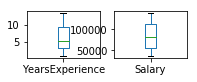

In [6]:
data.plot(kind='box',subplots=True , layout=(4,4))

In [7]:
data.skew()

YearsExperience    0.420163
Salary             0.209005
dtype: float64

In [8]:
from  scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[1.46039873, 1.40702756],
       [1.40432198, 1.19055984],
       [1.34824523, 1.45787949],
       [1.20805336, 1.27510276],
       [1.15197661, 1.38974043],
       [0.955708  , 0.86131566],
       [0.92766962, 0.75065276],
       [0.87159288, 0.93062192],
       [0.87159288, 0.61516328],
       [0.73140101, 0.84406007],
       [0.67532426, 0.65387005],
       [0.64728589, 0.88806655],
       [0.64728589, 0.85137871],
       [0.61924751, 0.84746702],
       [0.50709402, 0.72033719],
       [0.39494052, 0.50497357],
       [0.33886377, 0.56519463],
       [0.28278703, 0.02705373],
       [0.11455678, 0.08147035],
       [0.08651841, 0.31528198],
       [0.13778858, 0.24581799],
       [0.2219037 , 0.45197021],
       [0.44621069, 0.54752264],
       [0.53032581, 0.9421614 ],
       [0.67051768, 0.80395897],
       [0.7546328 , 0.68253893],
       [0.89482467, 1.04175169],
       [0.92286305, 0.90503191],
       [1.11913166, 1.21279336],
       [1.17520841, 1.19642106],
       [1.

In [9]:
df=data[(zs<3).all(axis=1)]

In [10]:
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (35, 2)
shape of the data without  outliers   (35, 2)


*******box plots before outliers removal*******


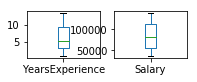

*******box plots after outliers removal*******


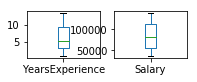

In [11]:
print('*******box plots before outliers removal*******')
data.plot(kind='box',subplots=True , layout=(4,4))
plt.show()
print('*******box plots after outliers removal*******')
df.plot(kind='box',subplots=True , layout=(4,4))
plt.show()

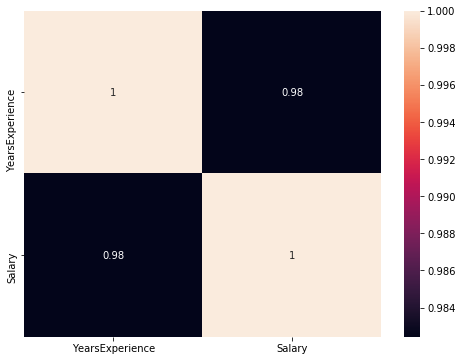

In [13]:
df_cor=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor , annot =True)

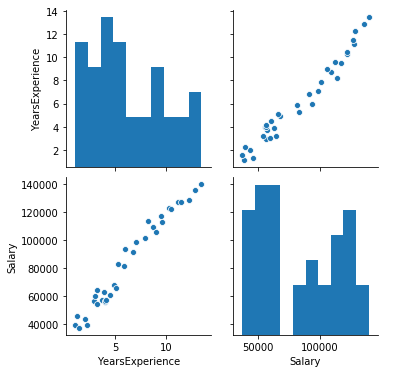

In [14]:
sns.pairplot(df)

In [15]:
y=df['Salary']
x=df.drop(['Salary'] ,axis=1)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum accuracy reached is {} at random state {}' .format(max_r2_score,Final_r_state))
    

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
#max_depth = np.arange(30)
lreg=LinearRegression()
max_r2_score(lreg,x,y)


The maximum accuracy reached is 0.9818524206735365 at random state 71


In [59]:
print('cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())

cross_val_score -0.7021703650913054


In [34]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 2}

In [39]:
knr=KNeighborsRegressor(n_neighbors=2)
max_r2_score(lreg,x,y)
from sklearn.model_selection import cross_val_score
print('cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())

The maximum accuracy reached is 0.9818524206735365 at random state 71
cross_val_score -2.3529440794915546


In [41]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

In [50]:
lsreg=Lasso(alpha=1)
max_r2_score(lreg,x,y)
print('mean of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())


The maximum accuracy reached is 0.9818524206735365 at random state 71
mean of cross_val_score -0.7020991932897526
std deviation of cross_val_score 1.2798107837092079


In [45]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(1,30)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 4}

In [51]:
DT=DecisionTreeRegressor(max_depth=4)
max_r2_score(DT,x,y)
print('mean of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').std())

The maximum accuracy reached is 0.975903526256932 at random state 93
mean of cross_val_score -2.3252525835182944
std deviation of cross_val_score 2.0014954817981603


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [52]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
max_r2_score(lreg,x,y)
print('mean of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

The maximum accuracy reached is 0.9818524206735365 at random state 71
mean of cross_val_score -2.6580756979128
std deviation of cross_val_score 2.373998984365803


In [57]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DT]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 1,
 'n_estimators': 100}

In [58]:
ad=AdaBoostRegressor(learning_rate=1,n_estimators=100,base_estimator=lreg)
max_r2_score(ad,x,y)
print('mean of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').std())

The maximum accuracy reached is 0.9815318579290544 at random state 87
mean of cross_val_score -0.7437119559387946
std deviation of cross_val_score 2.125202981124981


After trying the regression models , linear regression model is finalised as its accuracy and cross val score is better than other
models

the best parameter for linear regression model are as follows:-

1)r_state = 71

In [64]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=71)
lreg=LinearRegression()
lreg.fit(train_x,train_y)
pred=lreg.predict(test_x)

In [65]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))

RMSE 4727.500753374202
r2_score 0.9818524206735365


In [66]:
from sklearn.externals import joblib
joblib.dump(lreg,"linearReg_Salary.pkl")

['linearReg_Salary.pkl']